<a href="https://colab.research.google.com/github/jramasani/3D_GFP_GAN/blob/main/GFPGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GFPGAN Inference Demo 
### (No colorization; No CUDA extensions required)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

If you want to use the paper model, please go to this [Colab Demo](https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing) for GFPGAN <a href="https://colab.research.google.com/drive/1Oa1WwKB4M4l1GmR7CtswDVgOCOeSLChA?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [1]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 378 (delta 118), reused 89 (delta 89), pack-reused 231
Receiving objects: 100% (378/378), 5.28 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (200/200), done.
/content/GFPGAN
     |████████████████████████████████| 161 kB 5.4 MB/s 
     |████████████████████████████████| 5.8 MB 39.7 MB/s 
     |████████████████████████████████| 190 kB 51.6 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194439 sha256=1fe3d5a2620ac9ce9af44de37ece124c0ff734a3f2f6d9dd023407cc1599569e
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 177 kB 10.9 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-

# 2. Upload Images / Use the demo images

In [2]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving download.jpeg to download.jpeg
move download.jpeg to inputs/upload/download.jpeg


### OR you can use the demo image by running the following codes

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')

'inputs/upload/Blake_Lively.jpg'

## 3. Inference

In [3]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python inference_gfpgan.py --upscale 2 --test_path inputs/upload --save_root results --model_path experiments/pretrained_models/GFPGANCleanv1-NoCE-C2.pth --bg_upsampler realesrgan

!ls results/cmp

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.7/dist-packages/realesrgan/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 116MB/s]
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 154MB/s] 
Processing download.jpeg ...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
	Til

## 4. Visualize

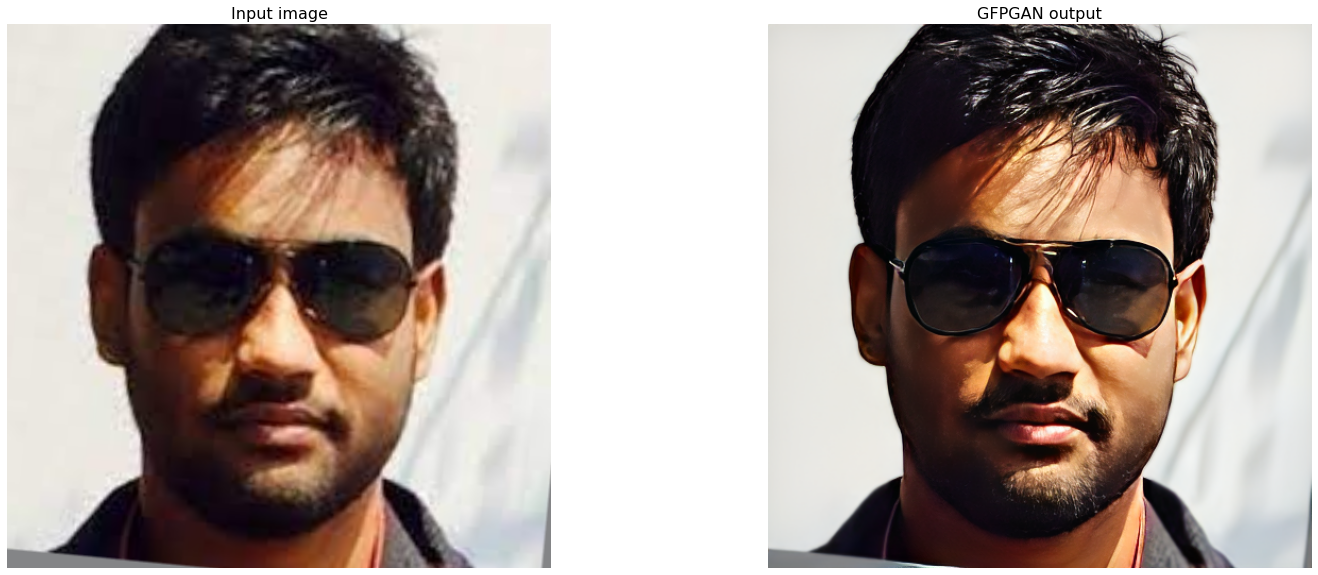

In [4]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


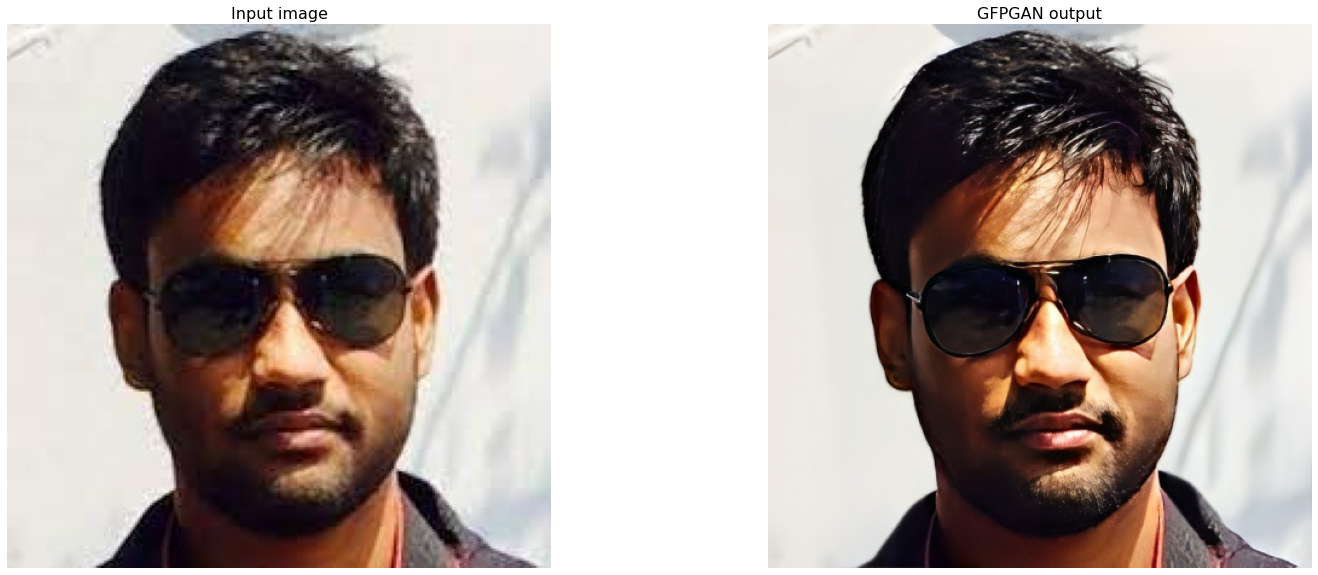

In [5]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [7]:
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.2.0.32
!pip3 install vispy==0.6.4
!pip3 install moviepy==1.0.2
!pip3 install transforms3d==0.3.1
!pip3 install networkx==2.3
!sudo apt install sed


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9 MB 24 kB/s 
     |████████████████████████████████| 4.0 MB 30.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0+cu100 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0+cu100 which is incompatible.
realesrgan 0.2.3.0 requires torch>=1.7, but you have torch 1.4.0+cu100 which is i

     |████████████████████████████████| 2.3 MB 5.6 MB/s 
     |████████████████████████████████| 890 kB 41.1 MB/s 
     |████████████████████████████████| 7.8 MB 4.8 MB/s 
     |████████████████████████████████| 3.3 MB 41.6 MB/s 
     |████████████████████████████████| 26.9 MB 1.5 MB/s 
     |████████████████████████████████| 4.3 MB 36.0 MB/s 
  Created wheel for moviepy: filename=moviepy-1.0.2-py3-none-any.whl size=110746 sha256=6ae69d601a1522d674beed165d7d3b6ce4dc965e13eec2b4303ff6ad91c04103
  Stored in directory: /root/.cache/pip/wheels/f0/36/f2/32c37d2b7a4f04622ccec875f71ebf5f33f892cea410f26454
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6157 sha256=52b7d212c2cff2648c7ddf25af58873a3a7d8d7963a57fadc90d2203f57685df
  Stored in directory: /root/.cache/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-

     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for transforms3d: filename=transforms3d-0.3.1-py3-none-any.whl size=59373 sha256=6cc72a15642ce1478141f2c8514c2185c587feb2ef690d936e7f8211d30ebda1
  Stored in directory: /root/.cache/pip/wheels/b5/b7/93/8985551f83720ce37548a5b543c75380bb707955a9c2c5d28c
Successfully built transforms3d
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=9ab736f577d1046ff3bbad08181b591543adfc50faaec5a31b3fffeb8c953d40
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

In [8]:
%cd /content/
!git clone https://github.com/vt-vl-lab/3d-photo-inpainting.git
%cd 3d-photo-inpainting
!sh download.sh

/content
Cloning into '3d-photo-inpainting'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 372 (delta 9), reused 15 (delta 9), pack-reused 350
Receiving objects: 100% (372/372), 130.14 MiB | 33.69 MiB/s, done.
Resolving deltas: 100% (201/201), done.
/content/3d-photo-inpainting
downloading from filebox ...
--2022-01-07 10:40:37--  https://filebox.ece.vt.edu/~jbhuang/project/3DPhoto/model/color-model.pth
Resolving filebox.ece.vt.edu (filebox.ece.vt.edu)... 128.173.88.43
Connecting to filebox.ece.vt.edu (filebox.ece.vt.edu)|128.173.88.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206331633 (197M)
Saving to: ‘color-model.pth’

color-model.pth     100%[===================>] 196.77M  33.5MB/s    in 6.4s    

2022-01-07 10:40:43 (30.6 MB/s) - ‘color-model.pth’ saved [206331633/206331633]

--2022-01-07 10:40:43--  https://filebox.ece.vt.edu/~jbhuang/project/3

In [9]:
!sed -i 's/offscreen_rendering: True/offscreen_rendering: False/g' argument.yml

In [29]:
!ls

3d-photo-inpainting  GFPGAN  sample_data


In [30]:
shutil.move('GFPGAN/results/restored_imgs/download.jpeg', '3d-photo-inpainting/image/download.jpg')

'3d-photo-inpainting/image/download.jpeg'

In [32]:
%cd 3d-photo-inpainting/

/content/3d-photo-inpainting


In [38]:
!python main.py --config argument.yml

running on device 0
  0% 0/1 [00:00<?, ?it/s]Current Source ==>  download
Running depth extraction at 1641554915.1319811
BoostingMonocularDepth/inputs/*.jpg
device: cuda
Namespace(Final=True, R0=False, R20=False, colorize_results=False, data_dir='inputs/', depthNet=0, max_res=inf, net_receptive_field_size=None, output_dir='outputs', output_resolution=1, pix2pixsize=1024, savepatchs=0, savewholeest=0)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pix/checkpoints         
         colorize_results: False                         
                crop_size: 672                           
                 data_dir: inputs/                       	[default: None]

## 5. Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>